# **Investment Opportunity Analysis**

### **Problem Statement**

You work for Spark Funds, an asset management company. Spark Funds wants to make investments in a few companies. The CEO of Spark Funds wants to understand the global trends in investments so that she can take the investment decisions effectively.

The objective is to identify the best sectors, countries, and a suitable investment type for making investments. The overall strategy is to invest where others are investing, implying that the ‘best’ sectors and countries are the ones ‘where most investors are investing’.

While finding the best investment opportunities, Spark Funds has two minor constraints for investments:
- It wants to invest between 5 to 15 million USD per round of investment
- It wants to invest only in English-speaking countries because of the ease of communication with the companies it would invest in

### **Business Focuses**

For your analysis, consider a country to be English speaking only if English is one of the official languages in that country.
- **Investment type analysis**: Comparing the typical investment amounts in the venture, seed, angel, private equity etc. so that Spark Funds can choose the type that is best suited for their strategy. 
- **Country analysis**: Identifying the countries which have been the most heavily invested in the past. These will be Spark Funds’ favourites as well. 
- **Sector analysis**: Understanding the distribution of investments across the eight main sectors. (Note that we are interested in the eight ‘main sectors’ provided in the mapping file. The two files — companies and rounds2 — have numerous sub-sector names; hence, you will need to map each sub-sector to its main sector.)

In [1]:
from matplotlib import pyplot as plt 
import seaborn as sns
%matplotlib inline
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

### **Step 1: Reading and Understanding the Data**
Let's start with the following steps:

1. Importing all of the required datasets using the pandas library
2. Understanding the structure and quality of the data

In [2]:
companies = pd.read_csv(
    "datasets/companies.txt",sep="\t",encoding="unicode_escape")
companies

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010
...,...,...,...,...,...,...,...,...,...,...
66363,/Organization/Zznode-Science-And-Technology-Co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,operating,CHN,22,Beijing,Beijing,NaN
66364,/Organization/Zzzzapp-Com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
66365,/Organization/ÃEron,ÃERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011
66366,/Organization/ÃAsys-2,Ãasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014


In [3]:
import codecs

rounds_two = pd.read_csv(codecs.open("datasets/rounds2.csv","r",encoding='utf-8',
                            errors='ignore'))
rounds_two

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,5/1/2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,1/3/2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
...,...,...,...,...,...,...
114944,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,1/3/2014,41313.0
114945,/ORGANIZATION/ZZZZAPP-COM,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,1/5/2013,32842.0
114946,/organization/eron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,1/8/2014,NaN
114947,/ORGANIZATION/ÔASYS-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,1/1/2015,18192.0


In [4]:
mapping = pd.read_csv(
    'datasets/mapping.csv').dropna().drop(
        'Blanks', axis = True)
mapping

,category_list,Automotive & Sports,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3D,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...
683,Wholesale,0,0,0,0,0,0,1,0
684,Wine And Spirits,0,0,1,0,0,0,0,0
685,Wireless,0,0,1,0,0,0,0,0
686,Women,0,0,0,0,0,0,1,0


In [5]:
companies.describe(include='object').T

,count,unique,top,freq
permalink,66368,66368,/Organization/-Fame,1
name,66367,66102,Blink,4
homepage_url,61310,61191,http://www.askforoffer.com,5
category_list,63220,27296,Software,3995
status,66368,4,operating,53034
country_code,59410,137,USA,37601
state_code,57821,311,CA,12900
region,58338,1092,SF Bay Area,8804
city,58340,5111,San Francisco,3526
founded_at,51147,3978,01-01-2012,2730


In [6]:
rounds_two.describe(include='object').T

,count,unique,top,freq
company_permalink,114949,90247,/ORGANIZATION/SOLARFLARE,10
funding_round_permalink,114949,114949,/funding-round/9a01d05418af9f794eebff7ace91f638,1
funding_round_type,114949,14,venture,55494
funding_round_code,31140,8,A,14747
funded_at,114949,5033,1/1/2014,779


In [7]:
rounds_two.describe().T

,count,mean,std,min,25%,50%,75%,max
raised_amount_usd,94959.0,1.042687e+07,1.148212e+08,0.0,322500.0,1680511.0,7000000.0,2.127194e+10


In [8]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


In [9]:
rounds_two.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


#### Inference:
- We have three availables datasets: companies dataset which give us the details of each companies, rounds dataset which provides the information of the invests made per round, and the mapping dataset that contains the industry and sector breakdown of each companies.
- Companies dataset only contains categorical variables, 10 in total , some of which are hyperlinks while others are geographical details
- Rounds dataset has one numerical variable, `raised_amount_usd`, which will be analyzed frequently moving forward. The rest are categorical variables adding up to 6 features in total.
- There are 687 subsectors within 8 main sectors as shown in the mapping dataset.
- From the information provided, we also discovered that both companies and rounds datasets contains missing values. We will decide how to handle in the next steps. 

### **Step 2: Data Preprocessing and Transformation**
We will proceed to join and connect the datasets as well as modify the structure and remodel the dataset to better fit the purpose of our analysis.

#### Join Companies with Rounds Dataset
1. We will modify the text in permalink variable in companies dataset and the company_permalink variable in rounds dataset to lower case
2. Then, we can join the datasets on those variables using the merge function and left join

In [10]:
# we will join the companies and rounds datasets using the variables permalink and company_permalink 
# and we will be creating a new dataset called "investments"
companies['permalink'] = [item.lower() for item in companies['permalink']]
rounds_two['company_permalink'] = [item.lower() for item in rounds_two['company_permalink']]

investments = pd.merge(companies, rounds_two, how="inner", left_on="permalink", right_on="company_permalink")
investments.sort_values(by='permalink')

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,5/1/2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,1/3/2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114870,/organization/zznode-science-and-technology-co...,ZZNode Science and Technology,http://www.zznode.com,Enterprise Software,operating,CHN,22,Beijing,Beijing,NaN,/organization/zznode-science-and-technology-co...,/funding-round/171693e1e07e0230defd8fddb6de4515,venture,A,1/4/2012,1587301.0
114872,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012,/organization/zzzzapp-com,/funding-round/6ba41360588bc6e3f77e9b50a0ebfafa,seed,NaN,1/8/2013,33149.0
114873,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,1/3/2014,41313.0
114871,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012,/organization/zzzzapp-com,/funding-round/22ef2fafb4d20ac3aa4b86143dbf6c8e,seed,NaN,1/11/2011,7000.0


In [11]:
investments.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114875 entries, 0 to 114874
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   permalink                114875 non-null  object 
 1   name                     114874 non-null  object 
 2   homepage_url             108749 non-null  object 
 3   category_list            111488 non-null  object 
 4   status                   114875 non-null  object 
 5   country_code             106238 non-null  object 
 6   state_code               103972 non-null  object 
 7   region                   104749 non-null  object 
 8   city                     104752 non-null  object 
 9   founded_at               94387 non-null   object 
 10  company_permalink        114875 non-null  object 
 11  funding_round_permalink  114875 non-null  object 
 12  funding_round_type       114875 non-null  object 
 13  funding_round_code       31132 non-null   object 
 14  fund

In [12]:
# check the total number of unique companies being invested
print("There are",str(len(investments['name'].unique())),"unique companies.") 

There are 66035 unique companies.


#### Update the date variable to the correct format and drop uneccessary variables
1. Variable `funded_at` is supposed to be in datetime format but is currently in string/text/object format. We will proceed to convert it to datetime format.
2. Link or URL features will be dropped in companies and rounds datasets since they do not exhibit any useful characteristics for analysis

In [13]:
# convert the variable to datetime format
investments['funded_at'] = pd.to_datetime(investments['funded_at'])

# drop link or url features
for item in investments.columns:
    if 'url' in item.lower() or 'permalink' in item.lower():
        investments.drop(item, axis=True, inplace=True)

investments

,name,category_list,status,country_code,state_code,region,city,founded_at,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,#fame,Media,operating,IND,16,Mumbai,Mumbai,NaN,venture,B,2015-05-01,10000000.0
1,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,venture,A,2014-10-14,NaN
2,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,seed,NaN,2014-01-03,700000.0
3,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,venture,B,2014-01-30,3406878.0
4,0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,venture,A,2008-03-19,2000000.0
...,...,...,...,...,...,...,...,...,...,...,...,...
114870,ZZNode Science and Technology,Enterprise Software,operating,CHN,22,Beijing,Beijing,NaN,venture,A,2012-01-04,1587301.0
114871,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012,seed,NaN,2011-01-11,7000.0
114872,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012,seed,NaN,2013-01-08,33149.0
114873,Zzzzapp Wireless ltd.,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012,convertible_note,NaN,2014-01-03,41313.0


In [14]:
investments['status'].unique()

array(['operating', 'acquired', 'closed', 'ipo'], dtype=object)

In [15]:
investments.isna().sum() / len(investments)

name                  0.000009
category_list         0.029484
status                0.000000
country_code          0.075186
state_code            0.094912
region                0.088148
city                  0.088122
founded_at            0.178350
funding_round_type    0.000000
funding_round_code    0.728992
funded_at             0.000000
raised_amount_usd     0.173754
dtype: float64

#### Inference: 
- Above shows the number of missing values as a percentage of the total number of values. The most important variable we should take notice for imputation is `raised_amount_usd`
- Since, it constitutes 14.6 percentage of data. Imputing this column, `raised_amount_usd`, might cause us to end up with wrong analysis.

### **Step 3: Analyze the Data and Generate Insights to Answer the Business Problem**

We will be performing exploratory data analysis, data remodeling and various inferences on those to generate insights and propose solutions to the business problem.

In [16]:
investments.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114875 entries, 0 to 114874
Data columns (total 12 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   name                114874 non-null  object        
 1   category_list       111488 non-null  object        
 2   status              114875 non-null  object        
 3   country_code        106238 non-null  object        
 4   state_code          103972 non-null  object        
 5   region              104749 non-null  object        
 6   city                104752 non-null  object        
 7   founded_at          94387 non-null   object        
 8   funding_round_type  114875 non-null  object        
 9   funding_round_code  31132 non-null   object        
 10  funded_at           114875 non-null  datetime64[ns]
 11  raised_amount_usd   94915 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(10)
memory usage: 11.4+ MB


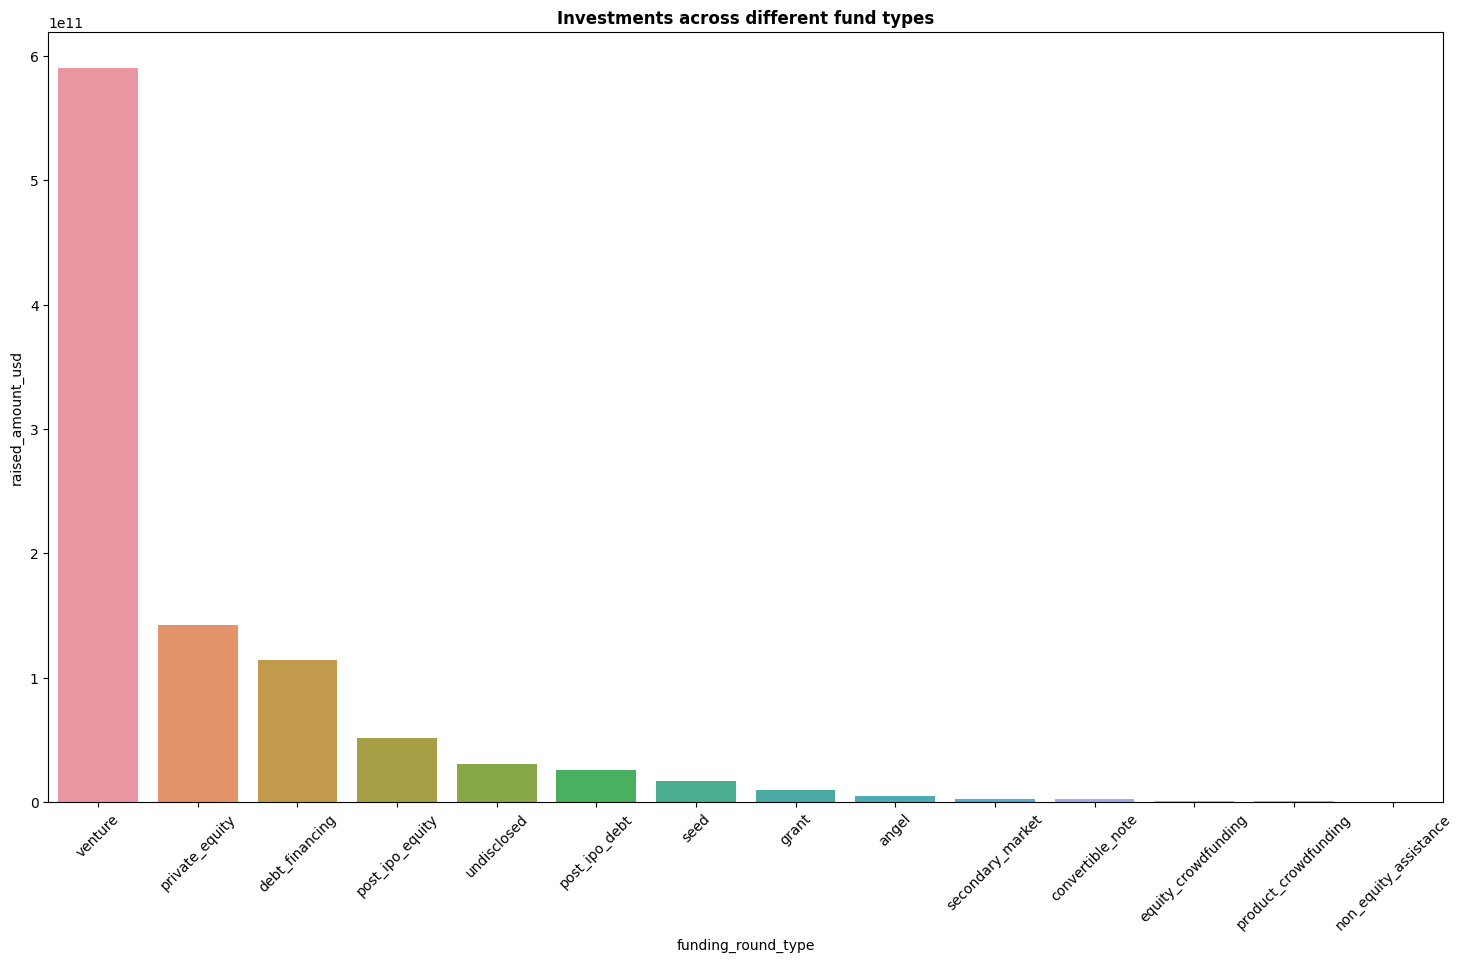

In [17]:
# show the value invested for all fund types
plt.figure(figsize = (18,10))
plt.title('Investments across different fund types', fontweight = 'bold')
sns.barplot(data=investments
            , x='funding_round_type'
            , y="raised_amount_usd"
            ,  estimator='sum'
            , errwidth = 0
            , ci=None
            , order=investments.groupby(
                'funding_round_type').sum().sort_values(
                    by ='raised_amount_usd', ascending=False).index
            )
plt.xticks(rotation=45)
plt.show()

#### Inference:
- From the visualization above, we found that there are more than a dozen fund types in total. However, the venture capital and private equity seems to be the most popular type of fundin terms of amount raised. 
- Based on the strategies of Spark Funds, we will be focusing on only 4 fund types for further analysis.

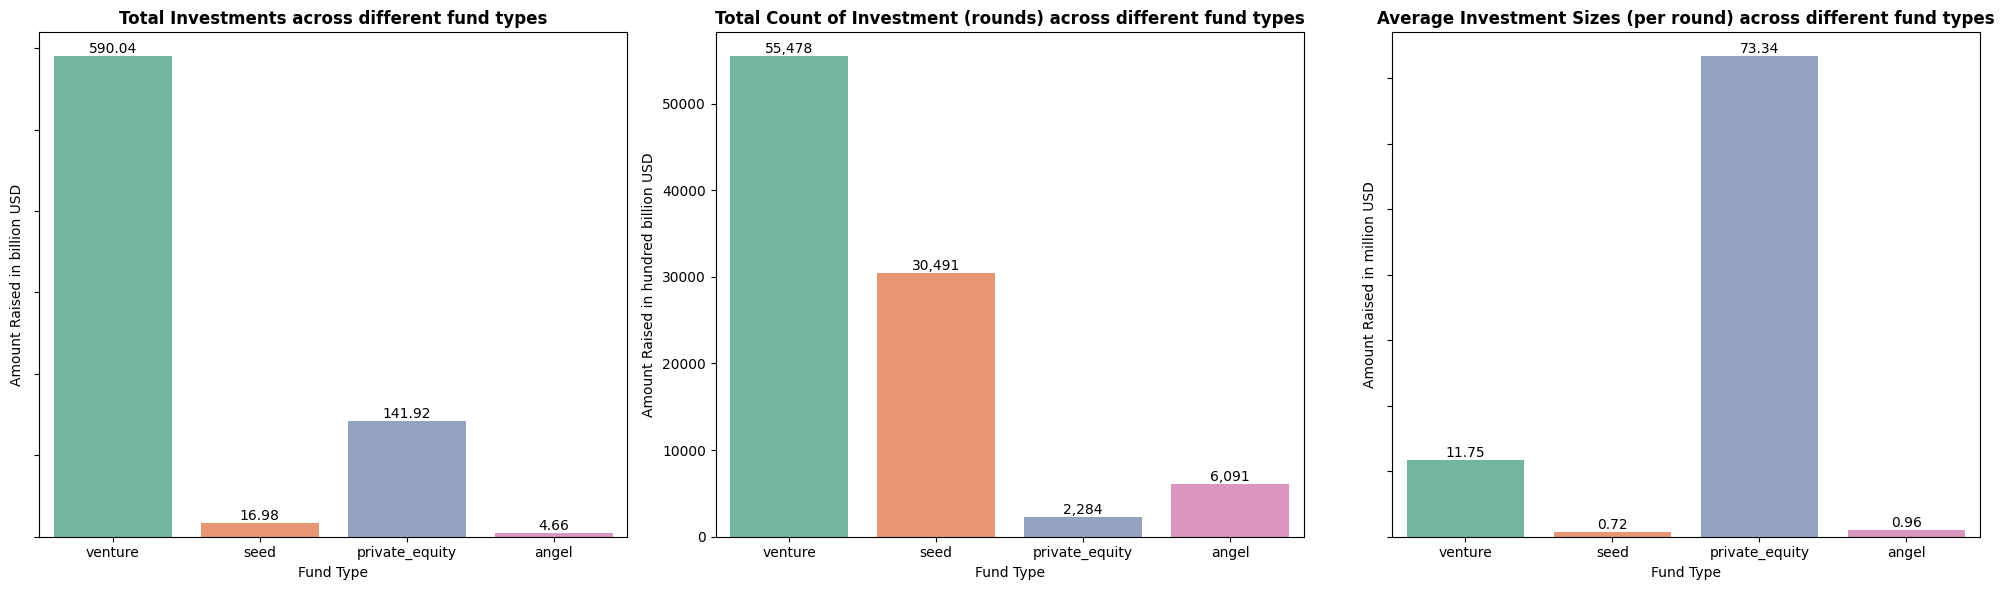

In [18]:
## since Spark Funds are only interested in a few types of funding, we'll focus on those

target_data = investments[
    [item in ['seed','angel','venture','private_equity'] for item in investments['funding_round_type']
     ]][['funding_round_type','raised_amount_usd']]


plt.figure(figsize = (20,6))
plt.rcParams.update({'font.size': 10})
palette_scheme = 'Set2'


plt.subplot(1,3,1)
ac= sns.barplot(data=target_data
            ,x = 'funding_round_type'
            , y= 'raised_amount_usd'
            , estimator='sum'
            , palette=palette_scheme
            , ci=None
            , errwidth=0
            )
ac.set(yticklabels=[])
ax = plt.gca() 
for p in ax.patches:
    ax.annotate(
        f'{(p.get_height()/10**9):.2f}'
        , (p.get_x() + p.get_width() / 2, p.get_height())
        , ha='center'
        , va='bottom')
plt.title('Total Investments across different fund types', fontweight = 'bold')
plt.xlabel('Fund Type')
plt.ylabel('Amount Raised in billion USD')

plt.subplot(1,3,2)
sns.countplot(data=target_data
            ,x = 'funding_round_type'
            , palette=palette_scheme
            )
ax = plt.gca() 
for p in ax.patches:
    ax.annotate(
        f'{(p.get_height()):,.0f}'
        , (p.get_x() + p.get_width() / 2, p.get_height())
        , ha='center'
        , va='bottom')
plt.title('Total Count of Investment (rounds) across different fund types', fontweight = 'bold')
plt.xlabel('Fund Type')
plt.ylabel('Amount Raised in hundred billion USD')

plt.subplot(1,3,3)
ac = sns.barplot(data=target_data
            ,x = 'funding_round_type'
            , y= 'raised_amount_usd'
            , estimator='mean'
            , palette=palette_scheme
            , ci=None
            , errwidth=0
            )
ac.set(yticklabels=[])
ax = plt.gca()
for p in ax.patches:
    ax.annotate(
        f'{(p.get_height()/10**6):.2f}'
        , (p.get_x() + p.get_width() / 2, p.get_height())
        , ha='center'
        , va='bottom')
plt.title('Average Investment Sizes (per round) across different fund types', fontweight = 'bold')
plt.xlabel('Fund Type')
plt.ylabel('Amount Raised in million USD')

plt.tight_layout()
plt.show()

#### Inference:
- Based on the insightful visualizations, it is evident that venture capital funding stands out as the most favored and prominent funding option, both in terms of the total amount raised and the number of investments made. However, it is noteworthy that each private equity funding round tends to secure the highest dollar value per round.
- Venture Capital funds have an average investment size of 11.75 million dollars per round, which aligns with Spark Funds' business goal
- Considering these findings, we can deduce that adopting a Venture Capital fund type would be a strategically sound choice for Spark Funds. This decision aligns with the prevailing market trends and demonstrates the potential for favorable returns on investments in early-stage and high-growth ventures.

#### Choose English Speaking Countries ONLY

Due to the constraints laid out above, we will select only the most popular English-speaking countries. We will import the codes and names of those countries with English as their working language from wikipedia.

In [19]:
# import the english speaking country code list from wikipedia
english_speaking_country_code=[]
for i in range(3,6):
    english_speaking_country_code.extend(pd.read_html(
        'https://en.wikipedia.org/wiki/List_of_countries_and_territories_where_English_is_an_official_language')[i]['ISO code'])
english_speaking_country_code[:5]

['ATG', 'BHS', 'BRB', 'BLZ', 'BWA']

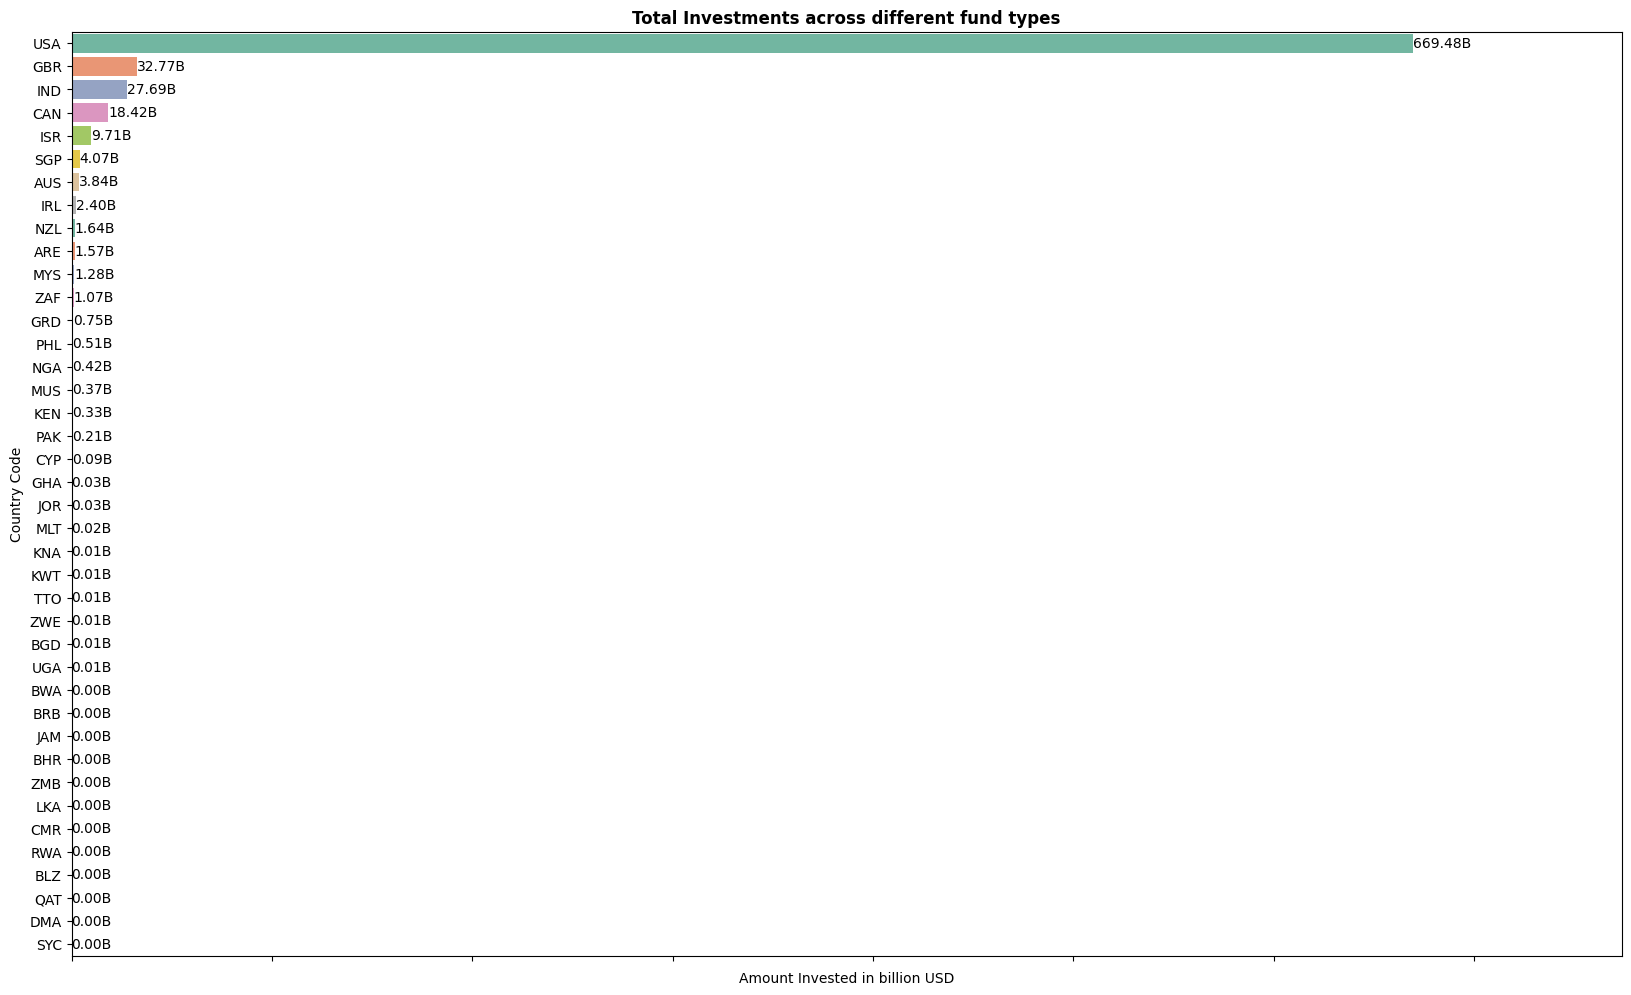

In [20]:
target_data = investments[
    [item in list(english_speaking_country_code) for item in investments['country_code']
     ]][['country_code','raised_amount_usd']]

plt.figure(figsize = (20,12))
ac = sns.barplot(data=target_data
            ,y= 'country_code'
            , x= 'raised_amount_usd'
            , palette=palette_scheme
            , errwidth=0
            , estimator='sum'
            , order=target_data.groupby(
                'country_code').sum()['raised_amount_usd'].sort_values(
                    ascending=False).index
            )
ac.set(xticklabels=[])
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{(p.get_width()/10**9):.2f}B'
                , (p.get_width(), p.get_y() + p.get_height() / 2)
                ,ha='left'
                , va='center')

plt.title('Total Investments across different fund types', fontweight = 'bold')
plt.xlabel('Amount Invested in billion USD')
plt.ylabel('Country Code')
plt.show()

In [21]:
# import the country names list from wikipedia
countries = pd.read_html('https://en.wikipedia.org/wiki/List_of_ISO_3166_country_codes')[0]
countries.columns = countries.columns.droplevel(0)
countries.columns = [item.split('[')[0] for item in countries.columns]
countries = countries[['Country name','Alpha-3 code']].rename(
    columns={'Alpha-3 code':'Country code'})
countries['Country name'] = [item.split('[')[0] for item in countries['Country name']]
countries

,Country name,Country code
0,Afghanistan,AFG
1,Åland Islands,ALA
2,Albania,ALB
3,Algeria,DZA
4,American Samoa,ASM
...,...,...
266,Wallis and Futuna,WLF
267,Western Sahara,ESH
268,Yemen,YEM
269,Zambia,ZMB


In [22]:
# merge the countries code, names dataset imported above with the investments dataset
investments = pd.merge(investments
                       , countries
                       , how="inner"
                       , left_on="country_code"
                       , right_on="Country code").drop('Country code'
                                                       ,axis=True)
investments

,name,category_list,status,country_code,state_code,region,city,founded_at,funding_round_type,funding_round_code,funded_at,raised_amount_usd,Country name
0,#fame,Media,operating,IND,16,Mumbai,Mumbai,NaN,venture,B,2015-05-01,10000000.0,India
1,1000Lookz,Beauty,operating,IND,25,Chennai,Chennai,01-01-2008,venture,NaN,2013-07-22,NaN,India
2,1CLICK,Chat|Mobile,acquired,IND,19,Bangalore,Bangalore,01-11-2012,seed,NaN,2014-01-26,NaN,India
3,21Diamonds,E-Commerce,operating,IND,10,New Delhi,Gurgaon,01-06-2012,venture,C,2012-11-15,6369507.0,India
4,24x7 Learning,EdTech|Education|Systems,operating,IND,19,Bangalore,Bangalore,01-01-2001,venture,NaN,2007-06-11,4000000.0,India
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106169,TapPress,Internet|iPad|Mobile|Publishing|Startups|Web T...,closed,SOM,2,SOM - Other,Mogadishu,10-10-2010,seed,NaN,2010-10-10,2000000.0,Somalia
106170,Unyqe,Apps|iPhone|Mobile|Software,closed,SYC,8,Seychelles,Victoria,10-11-2011,seed,NaN,2011-10-23,35000.0,Seychelles
106171,Viadedo,Transportation,operating,PRY,6,PRY - Other,AsunciÃ³n,01-04-2013,seed,NaN,2014-12-23,25000.0,Paraguay
106172,VoluBill,Software,acquired,MAF,NaN,MAF - Other,Marigot,01-01-2001,venture,C,2005-01-17,14403184.0,Saint Martin (French part)


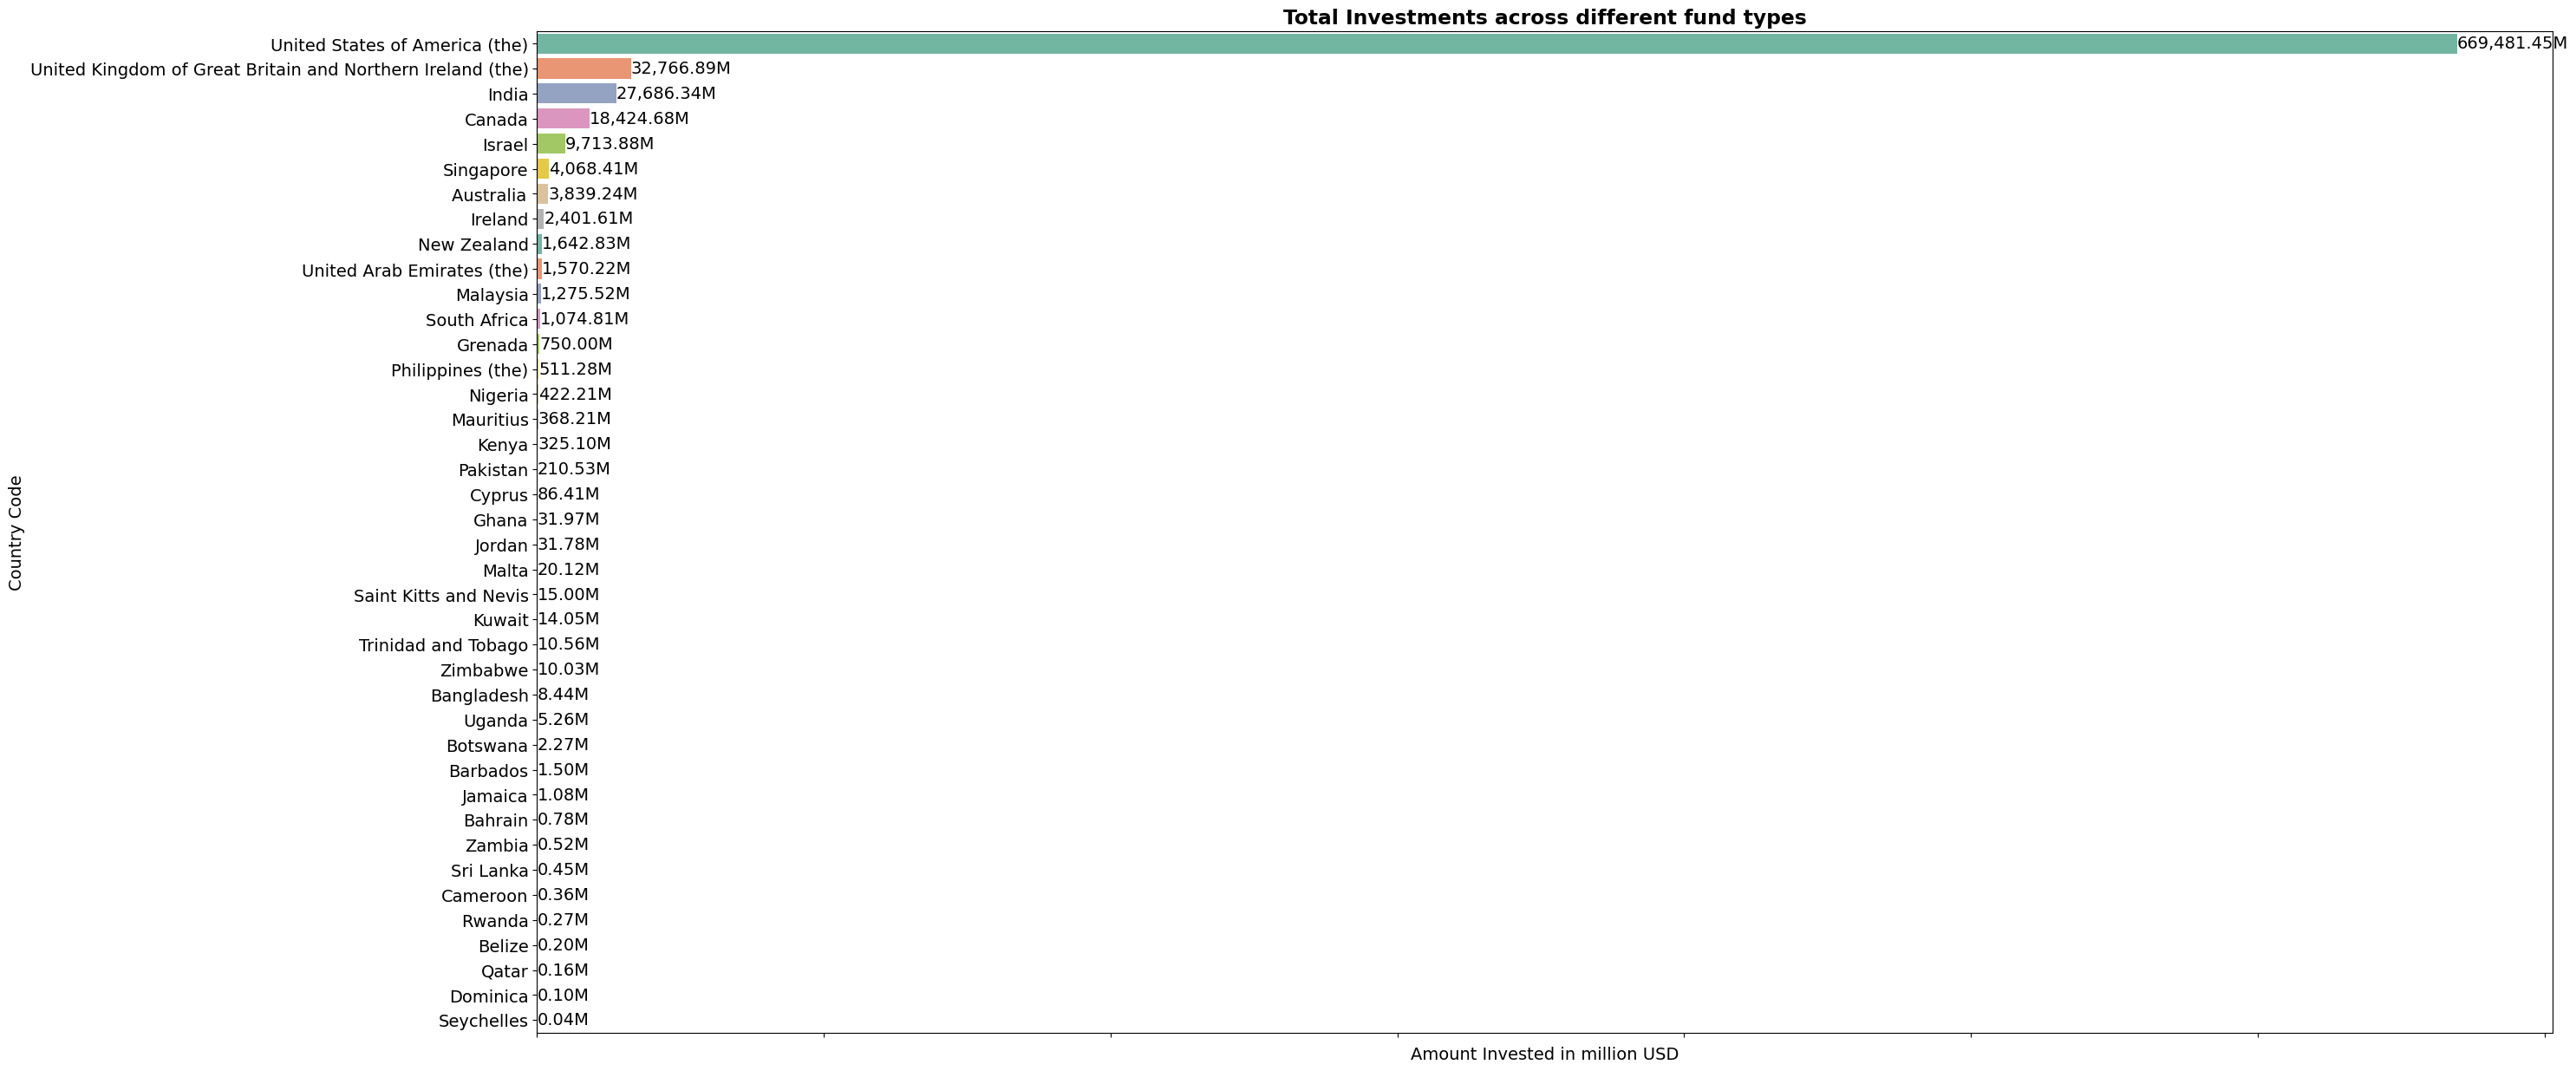

The five English speaking countries with the highest amount of investments are: 
 -  United States of America (the)
 -  United Kingdom of Great Britain and Northern Ireland (the)
 -  India
 -  Canada
 -  Israel


In [23]:
# plot the most popular country names based on amount of capital raised
target_data = investments[
    [item in list(english_speaking_country_code) for item in investments['country_code']
     ]][['Country name','raised_amount_usd']].groupby(
         'Country name').sum().reset_index().sort_values(
            by='raised_amount_usd' , ascending=False)

plt.figure(figsize = (30,15))
plt.rcParams.update({'font.size': 14})
ac = sns.barplot(data=target_data
            ,y= 'Country name'
            , x= 'raised_amount_usd'
            , palette=palette_scheme
            , errwidth=0
            )
ac.set(xticklabels=[])
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{(p.get_width()/10**6):,.2f}M'
                , (p.get_width(), p.get_y() + p.get_height() / 2)
                ,ha='left'
                , va='center')

plt.title('Total Investments across different fund types', fontweight = 'bold')
plt.xlabel('Amount Invested in million USD')
plt.ylabel('Country Code')
plt.show()

print("The five English speaking countries with the highest amount of investments are: ",)
for item in target_data[:5].reset_index(drop = True)['Country name']:
    print(" - ",item)

#### Results:
The five English speaking countries that are the most popular with the highest amount of investments are: 
 -  United States of America
 -  United Kingdom of Great Britain and Northern Ireland
 -  India
 -  Canada
 -  Israel

#### Remodel the investments dataset and map the companies with the main sectors
We will extract each subsector from each company in the investments datasets and map them with the main sectors in the mapping dataset. Each companies may be related with more than one main sectors, for example, healthcare software (technology and healthcare).

In [24]:
investments['subsectors'] = [str(item).split("|") for item in investments['category_list']]
investments

,name,category_list,status,country_code,state_code,region,city,founded_at,funding_round_type,funding_round_code,funded_at,raised_amount_usd,Country name,subsectors
0,#fame,Media,operating,IND,16,Mumbai,Mumbai,NaN,venture,B,2015-05-01,10000000.0,India,[Media]
1,1000Lookz,Beauty,operating,IND,25,Chennai,Chennai,01-01-2008,venture,NaN,2013-07-22,NaN,India,[Beauty]
2,1CLICK,Chat|Mobile,acquired,IND,19,Bangalore,Bangalore,01-11-2012,seed,NaN,2014-01-26,NaN,India,"[Chat, Mobile]"
3,21Diamonds,E-Commerce,operating,IND,10,New Delhi,Gurgaon,01-06-2012,venture,C,2012-11-15,6369507.0,India,[E-Commerce]
4,24x7 Learning,EdTech|Education|Systems,operating,IND,19,Bangalore,Bangalore,01-01-2001,venture,NaN,2007-06-11,4000000.0,India,"[EdTech, Education, Systems]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106169,TapPress,Internet|iPad|Mobile|Publishing|Startups|Web T...,closed,SOM,2,SOM - Other,Mogadishu,10-10-2010,seed,NaN,2010-10-10,2000000.0,Somalia,"[Internet, iPad, Mobile, Publishing, Startups,..."
106170,Unyqe,Apps|iPhone|Mobile|Software,closed,SYC,8,Seychelles,Victoria,10-11-2011,seed,NaN,2011-10-23,35000.0,Seychelles,"[Apps, iPhone, Mobile, Software]"
106171,Viadedo,Transportation,operating,PRY,6,PRY - Other,AsunciÃ³n,01-04-2013,seed,NaN,2014-12-23,25000.0,Paraguay,[Transportation]
106172,VoluBill,Software,acquired,MAF,NaN,MAF - Other,Marigot,01-01-2001,venture,C,2005-01-17,14403184.0,Saint Martin (French part),[Software]


In [25]:
sector = []
for i in range(0,len(mapping)):
    for item in mapping.columns:
        if item != 'category_list':
            if mapping[item].iloc[i] == 1:
                sector.append(item)

mapping['main_sector'] = sector
mapping

,category_list,Automotive & Sports,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising",main_sector
1,3D,0,0,0,0,1,0,0,0,Manufacturing
2,3D Printing,0,0,0,0,1,0,0,0,Manufacturing
3,3D Technology,0,0,0,0,1,0,0,0,Manufacturing
4,Accounting,0,0,0,0,0,0,0,1,"Social, Finance, Analytics, Advertising"
5,Active Lifestyle,0,0,0,1,0,0,0,0,Health
...,...,...,...,...,...,...,...,...,...,...
683,Wholesale,0,0,0,0,0,0,1,0,Others
684,Wine And Spirits,0,0,1,0,0,0,0,0,Entertainment
685,Wireless,0,0,1,0,0,0,0,0,Entertainment
686,Women,0,0,0,0,0,0,1,0,Others


In [26]:
main_sectors = []
for i in range(0,len(investments)):
    main_sector = []
    for item in investments['subsectors'].iloc[i]:
        try:
            main_sector.append(mapping[mapping['category_list'] == item]['main_sector'].values[0])
        except: None
    main_sector = np.array(main_sector)
    main_sectors.append(np.unique(main_sector))

investments['main_sector'] = main_sectors
investments

,name,category_list,status,country_code,state_code,region,city,founded_at,funding_round_type,funding_round_code,funded_at,raised_amount_usd,Country name,subsectors,main_sector
0,#fame,Media,operating,IND,16,Mumbai,Mumbai,NaN,venture,B,2015-05-01,10000000.0,India,[Media],[Entertainment]
1,1000Lookz,Beauty,operating,IND,25,Chennai,Chennai,01-01-2008,venture,NaN,2013-07-22,NaN,India,[Beauty],[Health]
2,1CLICK,Chat|Mobile,acquired,IND,19,Bangalore,Bangalore,01-11-2012,seed,NaN,2014-01-26,NaN,India,"[Chat, Mobile]","[News, Search and Messaging]"
3,21Diamonds,E-Commerce,operating,IND,10,New Delhi,Gurgaon,01-06-2012,venture,C,2012-11-15,6369507.0,India,[E-Commerce],[Others]
4,24x7 Learning,EdTech|Education|Systems,operating,IND,19,Bangalore,Bangalore,01-01-2001,venture,NaN,2007-06-11,4000000.0,India,"[EdTech, Education, Systems]",[Others]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106169,TapPress,Internet|iPad|Mobile|Publishing|Startups|Web T...,closed,SOM,2,SOM - Other,Mogadishu,10-10-2010,seed,NaN,2010-10-10,2000000.0,Somalia,"[Internet, iPad, Mobile, Publishing, Startups,...","[News, Search and Messaging, Others]"
106170,Unyqe,Apps|iPhone|Mobile|Software,closed,SYC,8,Seychelles,Victoria,10-11-2011,seed,NaN,2011-10-23,35000.0,Seychelles,"[Apps, iPhone, Mobile, Software]","[News, Search and Messaging, Others]"
106171,Viadedo,Transportation,operating,PRY,6,PRY - Other,AsunciÃ³n,01-04-2013,seed,NaN,2014-12-23,25000.0,Paraguay,[Transportation],[Automotive & Sports]
106172,VoluBill,Software,acquired,MAF,NaN,MAF - Other,Marigot,01-01-2001,venture,C,2005-01-17,14403184.0,Saint Martin (French part),[Software],[Others]


In [27]:
mapping['main_sector'].unique()

array(['Manufacturing', 'Social, Finance, Analytics, Advertising',
       'Health', 'Automotive & Sports', 'Others',
       'Cleantech / Semiconductors', 'News, Search and Messaging',
       'Entertainment'], dtype=object)

In [28]:
for item in mapping['main_sector'].unique():
    sec= []
    for i in range(0,len(investments)):
        sec.append(int(item in investments['main_sector'].iloc[i]))
    investments[item] = sec
investments

,name,category_list,status,country_code,state_code,region,city,founded_at,funding_round_type,funding_round_code,...,subsectors,main_sector,Manufacturing,"Social, Finance, Analytics, Advertising",Health,Automotive & Sports,Others,Cleantech / Semiconductors,"News, Search and Messaging",Entertainment
0,#fame,Media,operating,IND,16,Mumbai,Mumbai,NaN,venture,B,...,[Media],[Entertainment],0,0,0,0,0,0,0,1
1,1000Lookz,Beauty,operating,IND,25,Chennai,Chennai,01-01-2008,venture,NaN,...,[Beauty],[Health],0,0,1,0,0,0,0,0
2,1CLICK,Chat|Mobile,acquired,IND,19,Bangalore,Bangalore,01-11-2012,seed,NaN,...,"[Chat, Mobile]","[News, Search and Messaging]",0,0,0,0,0,0,1,0
3,21Diamonds,E-Commerce,operating,IND,10,New Delhi,Gurgaon,01-06-2012,venture,C,...,[E-Commerce],[Others],0,0,0,0,1,0,0,0
4,24x7 Learning,EdTech|Education|Systems,operating,IND,19,Bangalore,Bangalore,01-01-2001,venture,NaN,...,"[EdTech, Education, Systems]",[Others],0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106169,TapPress,Internet|iPad|Mobile|Publishing|Startups|Web T...,closed,SOM,2,SOM - Other,Mogadishu,10-10-2010,seed,NaN,...,"[Internet, iPad, Mobile, Publishing, Startups,...","[News, Search and Messaging, Others]",0,0,0,0,1,0,1,0
106170,Unyqe,Apps|iPhone|Mobile|Software,closed,SYC,8,Seychelles,Victoria,10-11-2011,seed,NaN,...,"[Apps, iPhone, Mobile, Software]","[News, Search and Messaging, Others]",0,0,0,0,1,0,1,0
106171,Viadedo,Transportation,operating,PRY,6,PRY - Other,AsunciÃ³n,01-04-2013,seed,NaN,...,[Transportation],[Automotive & Sports],0,0,0,1,0,0,0,0
106172,VoluBill,Software,acquired,MAF,NaN,MAF - Other,Marigot,01-01-2001,venture,C,...,[Software],[Others],0,0,0,0,1,0,0,0


In [29]:
# List down the number of investment rounds and amount raised in each of the 8 sectors
a, i, s = [], [], []
for item in mapping['main_sector'].unique():
    amount= ((investments[item]*investments['raised_amount_usd']).sum()/(10**9)).round(0)
    investment= investments[item].sum()
    print( f"Number of Investment Rounds in the Sector of {str(item)} is", f"{investment:,.0f}")
    print( f"Total Amount Raised in the Sector of {str(item)} is", f"US$ {amount:,.0f} billion \n")
    a.append(amount) , i.append(investment), s.append(item)

Number of Investment Rounds in the Sector of Manufacturing is 9,815
Total Amount Raised in the Sector of Manufacturing is US$ 122 billion 

Number of Investment Rounds in the Sector of Social, Finance, Analytics, Advertising is 31,000
Total Amount Raised in the Sector of Social, Finance, Analytics, Advertising is US$ 243 billion 

Number of Investment Rounds in the Sector of Health is 12,553
Total Amount Raised in the Sector of Health is US$ 128 billion 

Number of Investment Rounds in the Sector of Automotive & Sports is 4,513
Total Amount Raised in the Sector of Automotive & Sports is US$ 44 billion 

Number of Investment Rounds in the Sector of Others is 50,382
Total Amount Raised in the Sector of Others is US$ 385 billion 

Number of Investment Rounds in the Sector of Cleantech / Semiconductors is 17,573
Total Amount Raised in the Sector of Cleantech / Semiconductors is US$ 234 billion 

Number of Investment Rounds in the Sector of News, Search and Messaging is 27,683
Total Amount 

In [30]:
sector_investment = pd.DataFrame({'Sector': s
                                  , 'Amount Raised (in billion USD)': a
                                  , 'Number of Investments Made':i})
sector_investment

,Sector,Amount Raised (in billion USD),Number of Investments Made
0,Manufacturing,122.0,9815
1,"Social, Finance, Analytics, Advertising",243.0,31000
2,Health,128.0,12553
3,Automotive & Sports,44.0,4513
4,Others,385.0,50382
5,Cleantech / Semiconductors,234.0,17573
6,"News, Search and Messaging",220.0,27683
7,Entertainment,120.0,18484


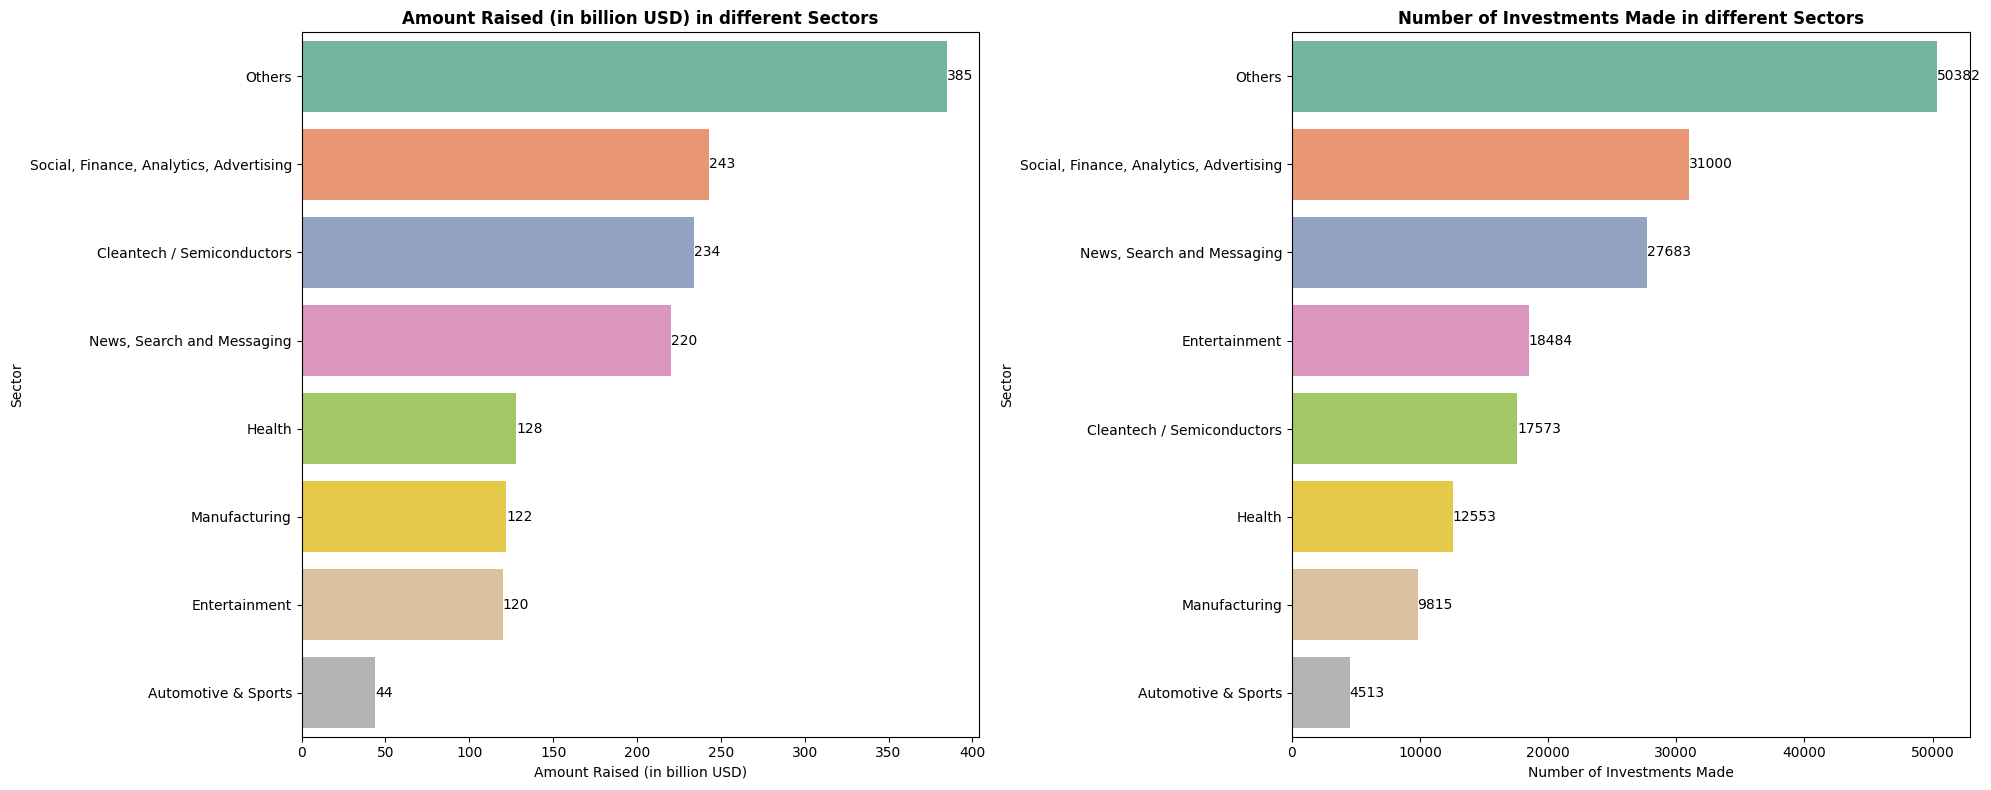

In [31]:
plt.figure(figsize=(20,8))
plt.rcParams.update({'font.size': 10})

plt.subplot(1,2,1)
ax= sns.barplot(
    data = sector_investment.sort_values(
        by ='Amount Raised (in billion USD)', ascending=False)
                , y= 'Sector'
                , x = 'Amount Raised (in billion USD)'
                ,palette=palette_scheme
                )
for i in ax.containers:
    ax.bar_label(i,)
plt.title("Amount Raised (in billion USD) in different Sectors"
        , fontweight='bold')


plt.subplot(1,2,2)
ax= sns.barplot(
    data = sector_investment.sort_values(
        by ='Number of Investments Made', ascending=False)
                , y= 'Sector'
                , x = 'Number of Investments Made'
                ,palette=palette_scheme
                )
for i in ax.containers:
    ax.bar_label(i,)
plt.title("Number of Investments Made in different Sectors"
          , fontweight='bold')

plt.tight_layout()
plt.show()

### **Outcome Assessment**

Based on a comprehensive analysis of investments across diverse industries, sectors, fund types, geographical regions, and capital raised, we have derived the optimal strategy for Spark Funds:

1. Venture Capital Fund Focus:
- We recommend adopting a Venture Capital fund approach, as it has shown to be by far the most popular fund strategy and investment vehicle in our analysis.

2. Target Investment Size:
- Aiming for an investment size of 12 million USD per round would align with the market dynamics and offer substantial opportunities for strategic positioning.

3. Geographic Focus:
- To maximize returns and manage risk, we advise concentrating on five key countries: USA, UK, India, Canada, and Israel. These countries exhibit strong economic prospects and promising investment landscapes.

4. Sector Diversification:
- To achieve a well-balanced portfolio, diversify across eight main sectors, such as automotives, entertainment, health, semiconductors, and others. This diversification approach mitigates exposure to sector-specific risks and leverages potential growth in multiple industries.

By implementing this refined strategy, Spark Funds can optimize its investment potential and make informed decisions that resonate with the dynamic nature of the financial markets. The thoughtful integration of these insights is expected to drive sustainable growth and foster long-term success in the ever-evolving investment landscape.